### This introduces you to an approach to get maximum accuracy on this dataset. I have used @sanjames approach for feature selection and then used Random Forest and Logistic regression to compute the predictions.

In [1]:
import os
for dirname, _, filenames in os.walk('indian_liver_patient.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Part 1
## Analysing the Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [3]:
liv_df = pd.read_csv('indian_liver_patient.csv')
liv_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
liv_df.shape

(583, 11)

*We can see the gender is the only non numeric column and the column named 'Dataset' has values 1(s) and 0(s) and which is simple boolean value it tell us about whether the patient is diseased or not.*

In [6]:
liv_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [7]:
liv_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

We have to make all the rows same and as Albumin and Globulin ration only has 579 rows we must use some preprocessing technique to get it done.

# Part 2
## Data visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


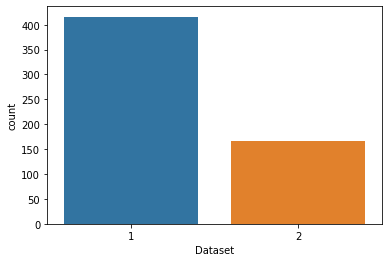

In [8]:
sns.countplot(data=liv_df, x = 'Dataset', label='Count')
LD, NLD = liv_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


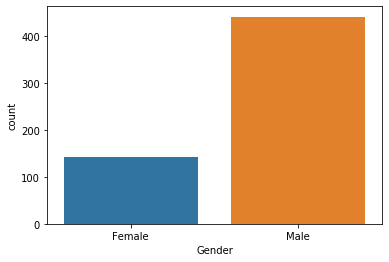

In [9]:
sns.countplot(data=liv_df, x = 'Gender', label='Count')
M, F = liv_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

C:\Users\kratika\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


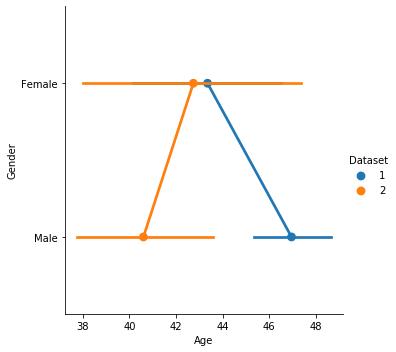

In [10]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liv_df);

Hence age is crucial factor here, which decides the prediction.

In [11]:
liv_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [12]:
liv_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


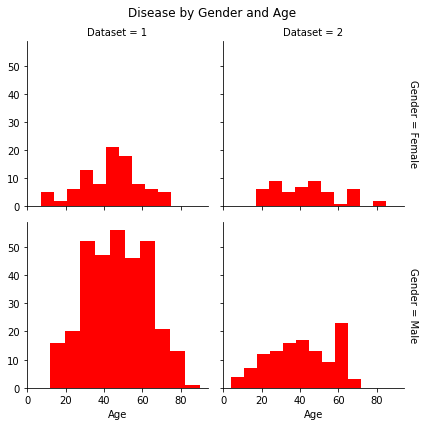

In [13]:
g = sns.FacetGrid(liv_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

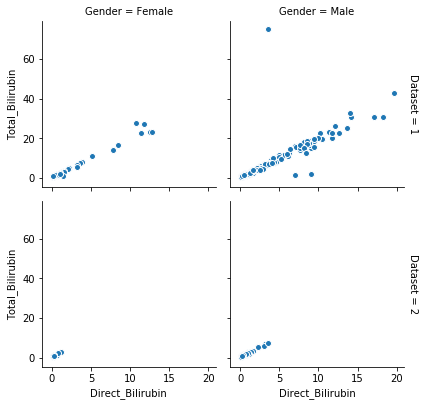

In [14]:
g = sns.FacetGrid(liv_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

*We can remove one of the columns from Direct bilirubin and Total bilirubin as they are linearly dependent.*

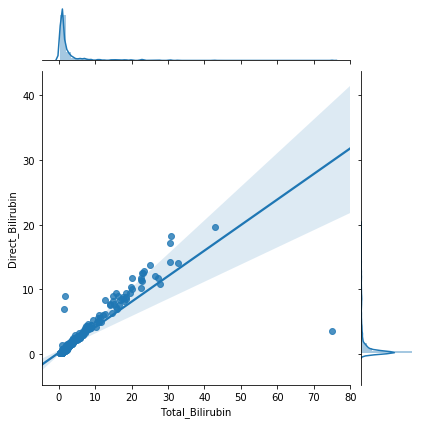

In [15]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liv_df, kind="reg")

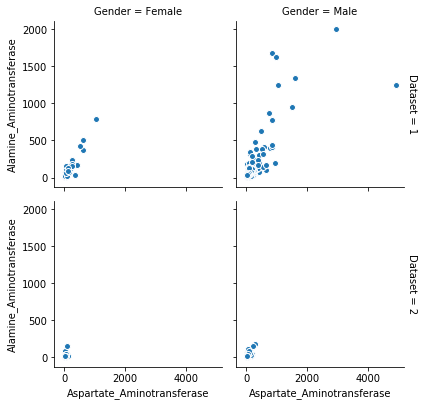

In [16]:
g = sns.FacetGrid(liv_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

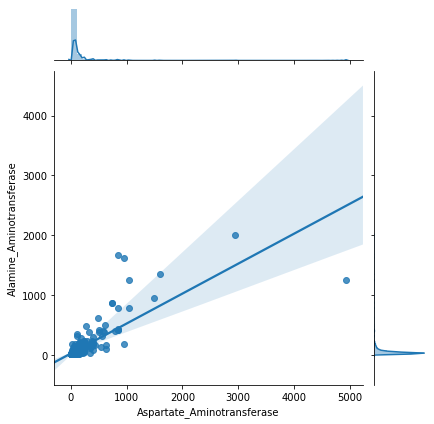

In [17]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liv_df, kind="reg")

*Similarly for Aspartate_Aminotransferase and Alamine_Aminotransferase*

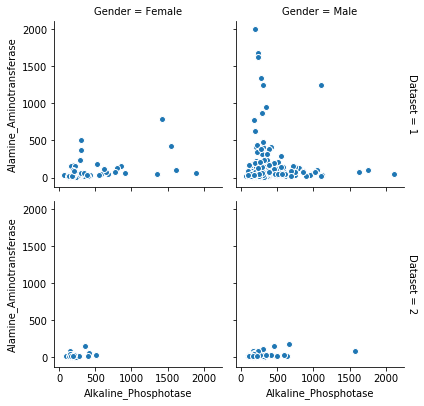

In [18]:
g = sns.FacetGrid(liv_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

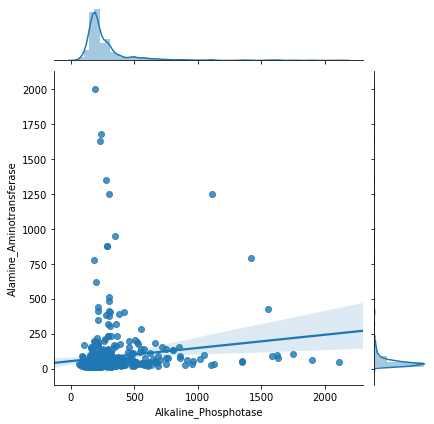

In [19]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liv_df, kind="reg")

*As there is no correlation between these two we need to consider both of them for the classification.*

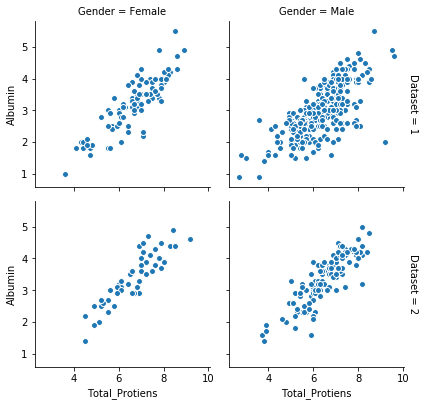

In [20]:
g = sns.FacetGrid(liv_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

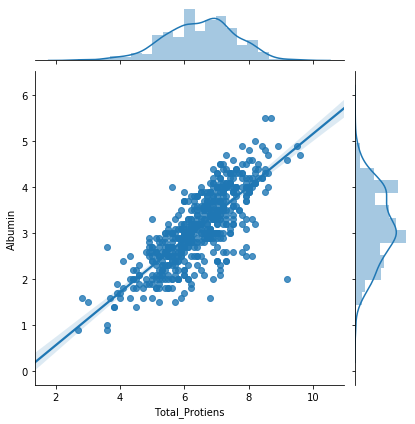

In [21]:
sns.jointplot("Total_Protiens", "Albumin", data=liv_df, kind="reg")

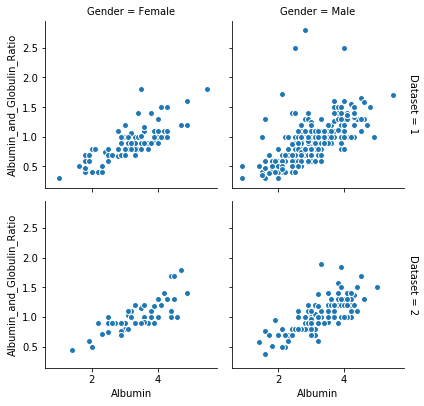

In [22]:
g = sns.FacetGrid(liv_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

*As there is linear dependency we can remove one of the features from the model prediction part*

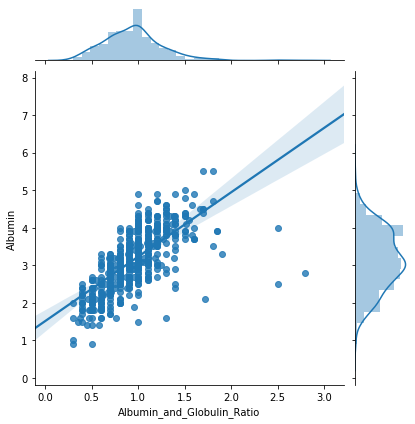

In [23]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liv_df, kind="reg")

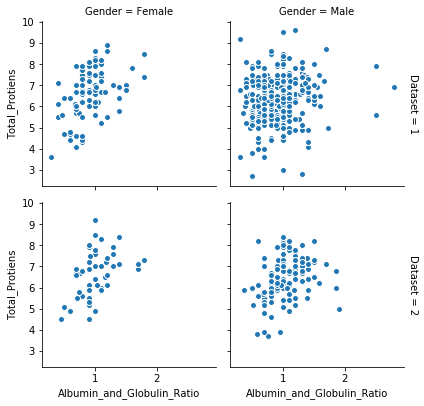

In [24]:
g = sns.FacetGrid(liv_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Selected Features
Hence from the aforementioned information we will only use the following features:
*   Total_Bilirubin
*   Alamine_Aminotransferase
*   Total_Protiens
*   Albumin_and_Globulin_Ratio
*   Albumin
*   Age 
*   Gender
*   Dataset






In [25]:
liv_df = pd.concat([liv_df,pd.get_dummies(liv_df['Gender'], prefix = 'Gender')], axis=1)
liv_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [26]:
liv_df[liv_df['Albumin_and_Globulin_Ratio'].isnull()] #the columns having null values

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [27]:
liv_df["Albumin_and_Globulin_Ratio"] = liv_df.Albumin_and_Globulin_Ratio.fillna(liv_df['Albumin_and_Globulin_Ratio'].mean())

# Part 3
## Building the ML model

In [28]:
from sklearn.model_selection import train_test_split
Droop_gender = liv_df.drop(labels=['Gender' ],axis=1 )
X = Droop_gender
y = liv_df['Dataset']

In [29]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predicting Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 100.0
Accuracy: 
 1.0
[[124   0]
 [  0  51]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00        51

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [66]:
y_test

228    2
128    1
429    1
141    1
308    1
      ..
224    1
464    2
568    1
387    1
246    1
Name: Dataset, Length: 175, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

C:\Users\kratika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Training Score: 
 100.0
Logistic Regression Test Score: 
 98.86
Coefficient: 
 [[-3.59322596e-02 -2.40912787e-01  2.06349037e-03 -5.29791256e-04
  -6.03662118e-03 -7.35041309e-03 -9.02196279e-01  4.93124459e-01
  -5.08298231e-01  6.04601405e+00 -5.08805587e-01 -7.39901941e-01]]
Intercept: 
 [-1.24870753]
Accuracy: 
 0.9885714285714285
Confusion Matrix: 
 [[123   1]
 [  1  50]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       124
           2       0.98      0.98      0.98        51

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



Text(0.5, 1, 'Correlation between features')

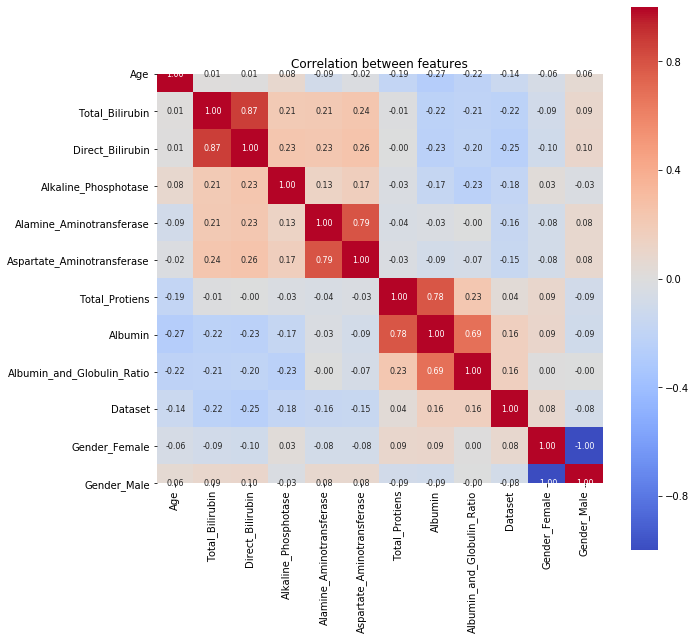

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           cmap= 'coolwarm')
plt.title('Correlation between features')

*Hence we can see the important features from this correlation heat maps which are*:
*   Total_Bilirubin
*   Alamine_Aminotransferase
*   Total_Protiens
*   Albumin_and_Globulin_Ratio
*   Albumin
*   Age 
*   Gender

*The above correlation also indicates the following correlation
 Total_Protiens & Albumin
 Alamine_Aminotransferase & Aspartate_Aminotransferase
 Direct_Bilirubin & Total_Bilirubin
 There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin* 

## Output

In [35]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','Random Forest'],
    'Score': [ logreg_score, random_forest_score],
    'Test Score': [ logreg_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
1,Random Forest,100.0,100.00
0,Logistic Regression,100.0,98.86


In [72]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(log_predicted)

probs = logreg.predict_proba(X_test)[:, 0]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.999841872232764


In [61]:
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs

array([9.68995088e-01, 2.56419901e-03, 2.92597206e-03, 6.62757833e-03,
       2.28030397e-02, 3.26172407e-02, 9.50294589e-01, 3.61186995e-02,
       3.33127795e-04, 3.24767779e-02, 8.93523645e-01, 9.38944936e-01,
       4.10156739e-02, 2.56143600e-02, 1.39424993e-03, 2.16447279e-02,
       3.96640332e-02, 9.20230360e-01, 9.56844036e-01, 9.70391888e-01,
       1.73086894e-01, 1.07416876e-03, 7.18983610e-02, 7.63884485e-03,
       1.48119892e-02, 1.19919371e-11, 1.54237752e-04, 8.95125787e-01,
       9.59203422e-01, 1.21078309e-01, 9.39765247e-01, 5.49722742e-02,
       1.61867358e-01, 8.47123361e-01, 9.74231254e-01, 1.43520700e-02,
       5.39343475e-04, 3.27716087e-06, 2.77481460e-02, 6.76081500e-03,
       9.71076731e-01, 5.26502037e-02, 9.66858923e-01, 4.75850968e-02,
       9.57216795e-01, 7.37340776e-02, 1.76404074e-02, 3.22222565e-03,
       1.24276175e-01, 1.91760210e-01, 2.00842444e-02, 9.83020270e-03,
       9.51948853e-01, 2.27383914e-02, 9.19401398e-01, 8.76096527e-01,
      

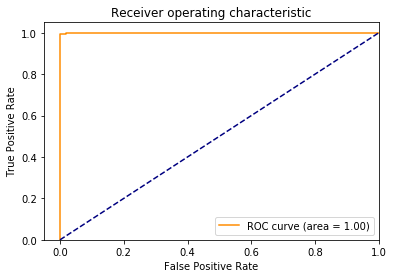

In [73]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")